### **Room Occupancy**

#### **Machine Learning**

**Elaborado por:** Fabian Villarreal Sosa

In [448]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns

from google.colab import drive

In [449]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [450]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Examenes/Examen2/Datos/')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Examenes/Examen2/Datos'

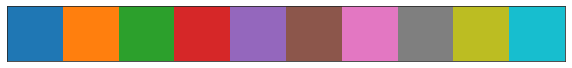

In [451]:
# Estilo de los graficos
sns.set_style('white')
csfont = {'fontname':'Calibri'}

# Paleta de colores
my_palette = ['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47', '#264478', '#9E480E', '#636363', '#997300'] # Excel color palette
my_palette2 = sns.color_palette('tab10')
sns.palplot(sns.color_palette('tab10'))

# Definir paleta
sns.set_palette(my_palette2)

In [452]:
# Cargar los datos
df = pd.read_csv('occupancy.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


#### **Limpieza y data mining**

In [453]:
# Dimensiones de la base de datos
df.shape
# La base consta de 8,143 registros y 7 variables

(8143, 7)

In [454]:
# Ver si existen valores perdidos
columnas_nans = df.columns[df.isna().any()] # Seleccionar columnas que tienen al menos un valor perdido
columnas_nans
# No existen valores perdidos

Index([], dtype='object')

In [455]:
# Informacion de la estructura de la base 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


In [456]:
# Convertir columna date de objeto a datos de tiempo
df['date'] = pd.to_datetime(df['date'])

In [457]:
# Estadistica descriptiva de la base de datos
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [458]:
# Alrededor del 21.23% de habitaciones/oficinas dentro de la base de datos se ocuparon 

#### **Visualización y exploración de datos**

In [459]:
df['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

In [460]:
round(df['Occupancy'].value_counts() / df.shape[0] * 100, 2)

0    78.77
1    21.23
Name: Occupancy, dtype: float64

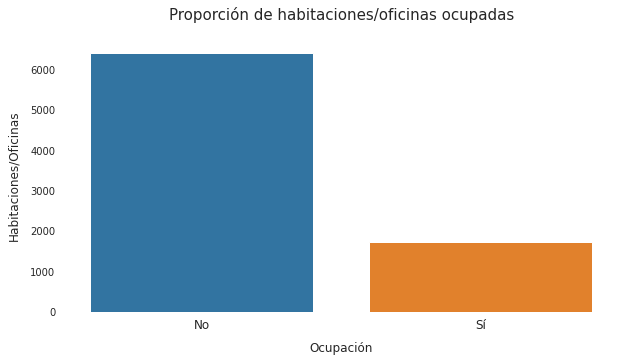

In [461]:
# Visualización de habitaciones/oficinas ocupadas
df['Count'] = 1
df1 = df.groupby(['Occupancy'])[['Count']].sum().reset_index()

sns.barplot(data = df1, x = 'Occupancy', y ='Count')
plt.title('Proporción de habitaciones/oficinas ocupadas', fontsize = 15, pad = 20)
plt.ylabel('Habitaciones/Oficinas', fontsize = 12, labelpad = 10)
plt.xlabel('Ocupación', fontsize = 12, labelpad = 10)
plt.xticks([0, 1], ['No', 'Sí'], rotation = 0, fontsize = 12)
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(10 ,5);

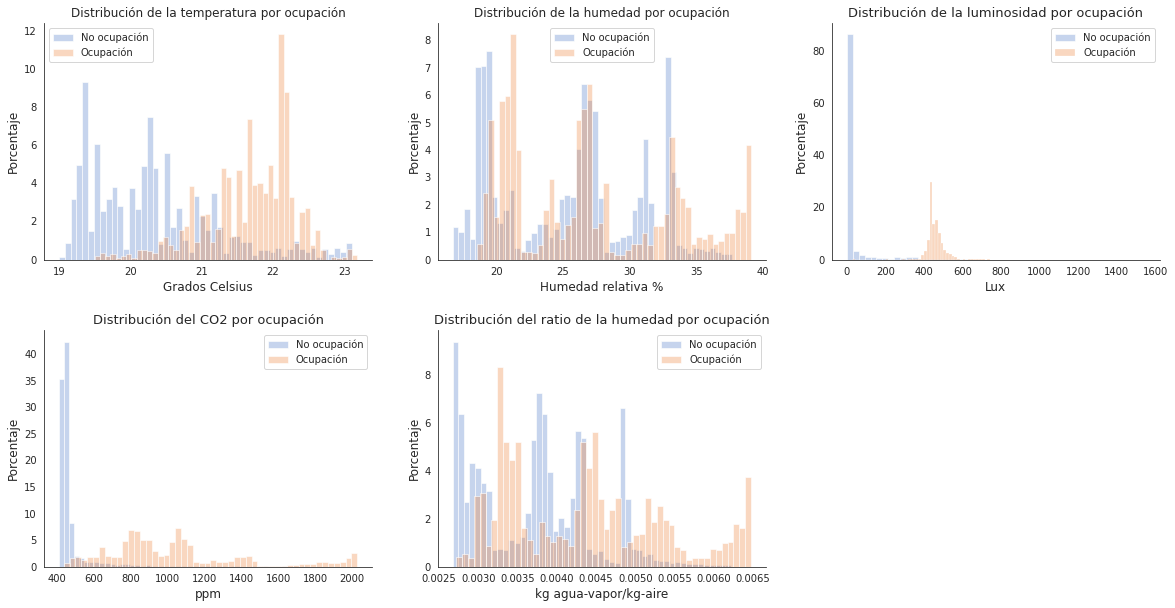

In [462]:
# Distribucion de variables por ocupacion - Histogramas
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10), sharex = False, sharey = False)
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
axes[1, 2].axis('off')

# Temperatura
sns.histplot(data = df[df['Occupancy'] == 0], x = 'Temperature', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No ocupación', ax = axes[0, 0])
sns.histplot(data = df[df['Occupancy'] == 1], x = 'Temperature', stat = 'percent', bins = 50, color = my_palette[1], alpha = 0.3, label = 'Ocupación', ax = axes[0, 0])

axes[0, 0].set_title('Distribución de la temperatura por ocupación', fontsize = 12)
axes[0, 0].legend()
axes[0, 0].set_ylabel('Porcentaje', fontsize = 12)
axes[0, 0].set_xlabel('Grados Celsius', fontsize = 12)

# Humedad
sns.histplot(data = df[df['Occupancy'] == 0], x = 'Humidity', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No ocupación', ax = axes[0, 1])
sns.histplot(data = df[df['Occupancy'] == 1], x = 'Humidity', stat = 'percent', bins = 50, color = my_palette[1], alpha = 0.3, label = 'Ocupación', ax = axes[0, 1])

axes[0, 1].set_title('Distribución de la humedad por ocupación', fontsize = 12)
axes[0, 1].legend()
axes[0, 1].set_ylabel('Porcentaje', fontsize = 12)
axes[0, 1].set_xlabel('Humedad relativa %', fontsize = 12)

# Luz
sns.histplot(data = df[df['Occupancy'] == 0], x = 'Light', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No ocupación', ax = axes[0, 2])
sns.histplot(data = df[df['Occupancy'] == 1], x = 'Light', stat = 'percent', bins = 50, color = my_palette[1], alpha = 0.3, label = 'Ocupación', ax = axes[0, 2])

axes[0, 2].set_title('Distribución de la luminosidad por ocupación', fontsize = 13)
axes[0, 2].legend()
axes[0, 2].set_ylabel('Porcentaje', fontsize = 12)
axes[0, 2].set_xlabel('Lux', fontsize = 12)

# CO2
sns.histplot(data = df[df['Occupancy'] == 0], x = 'CO2', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No ocupación', ax = axes[1, 0])
sns.histplot(data = df[df['Occupancy'] == 1], x = 'CO2', stat = 'percent', bins = 50, color = my_palette[1], alpha = 0.3, label = 'Ocupación', ax = axes[1, 0])

axes[1, 0].set_title('Distribución del CO2 por ocupación', fontsize = 13)
axes[1, 0].legend()
axes[1, 0].set_ylabel('Porcentaje', fontsize = 12)
axes[1, 0].set_xlabel('ppm', fontsize = 12)

# Ratio de humedad
sns.histplot(data = df[df['Occupancy'] == 0], x = 'HumidityRatio', stat = 'percent', bins = 50, color = my_palette[0], alpha = 0.3, label = 'No ocupación', ax = axes[1, 1])
sns.histplot(data = df[df['Occupancy'] == 1], x = 'HumidityRatio', stat = 'percent', bins = 50, color = my_palette[1], alpha = 0.3, label = 'Ocupación', ax = axes[1, 1])

axes[1, 1].set_title('Distribución del ratio de la humedad por ocupación', fontsize = 13)
axes[1, 1].legend()
axes[1, 1].set_ylabel('Porcentaje', fontsize = 12)
axes[1, 1].set_xlabel('kg agua-vapor/kg-aire', fontsize = 12)

sns.despine()

In [463]:
# Se puede observar que la temperatura, la luminosidad y el CO2 de la habitacion presentan 
# diferentes distribuciones al considerar las habitaciones/oficinas ocupadas y no ocupadas

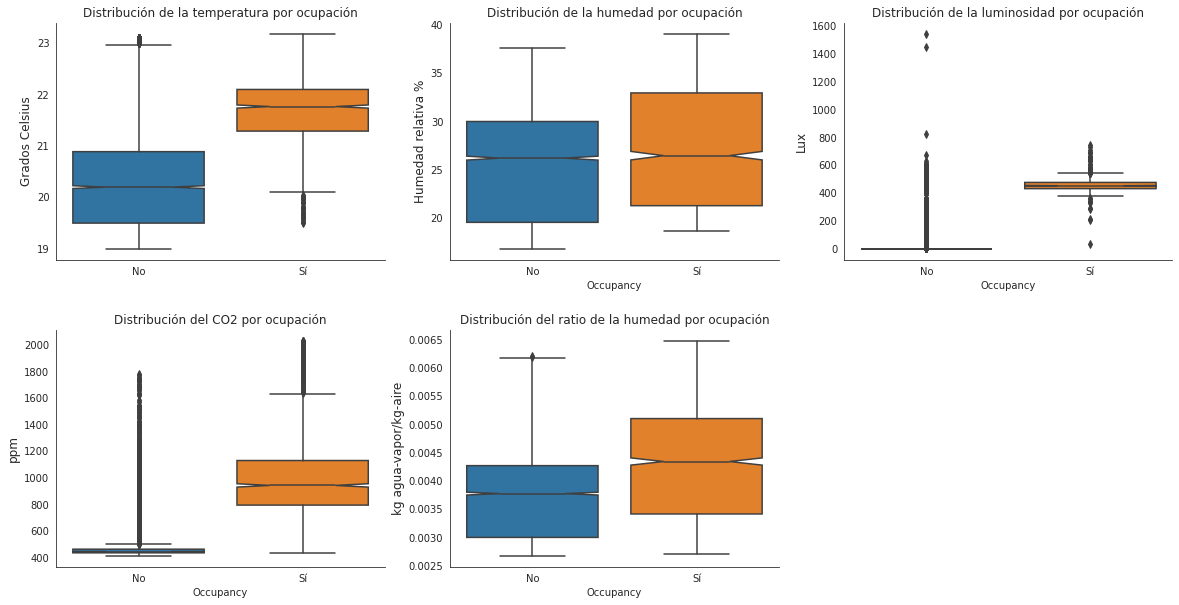

In [464]:
# Distribucion de variables por ocupacion - Boxplot
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10), sharex = False, sharey = False)
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
axes[1, 2].axis('off')

# Temperatura
sns.boxplot(data = df, x = 'Occupancy', y = 'Temperature', order = [0, 1], notch = True, ax = axes[0, 0])

axes[0, 0].set_title('Distribución de la temperatura por ocupación', fontsize = 12)
axes[0, 0].set_ylabel('Grados Celsius', fontsize = 12)
axes[0, 0].set_xlabel('')
plt.sca(axes[0, 0])
plt.xticks([0, 1], ['No', 'Sí']); 

# Humedad
sns.boxplot(data = df, x = 'Occupancy', y = 'Humidity', order = [0, 1], notch = True, ax = axes[0, 1])

axes[0, 1].set_title('Distribución de la humedad por ocupación', fontsize = 12)
axes[0, 1].set_ylabel('Humedad relativa %', fontsize = 12)
plt.sca(axes[0, 1])
plt.xticks([0, 1], ['No', 'Sí']); 

# Luz
sns.boxplot(data = df, x = 'Occupancy', y = 'Light', order = [0, 1], notch = True, ax = axes[0, 2])

axes[0, 2].set_title('Distribución de la luminosidad por ocupación', fontsize = 12)
axes[0, 2].set_ylabel('Lux', fontsize = 12)
plt.sca(axes[0, 2])
plt.xticks([0, 1], ['No', 'Sí']); 

# CO2
sns.boxplot(data = df, x = 'Occupancy', y = 'CO2', order = [0, 1], notch = True, ax = axes[1, 0])

axes[1, 0].set_title('Distribución del CO2 por ocupación', fontsize = 12)
axes[1, 0].set_ylabel('ppm', fontsize = 12)
plt.sca(axes[1, 0])
plt.xticks([0, 1], ['No', 'Sí']); 

# Ratio de humedad
sns.boxplot(data = df, x = 'Occupancy', y = 'HumidityRatio', order = [0, 1], notch = True, ax = axes[1, 1])

axes[1, 1].set_title('Distribución del ratio de la humedad por ocupación', fontsize = 12)
axes[1, 1].set_ylabel('kg agua-vapor/kg-aire', fontsize = 12)
plt.sca(axes[1, 1])
plt.xticks([0, 1], ['No', 'Sí']); 

sns.despine()

In [465]:
# Habitaciones/oficinas ocupadas por dia
# https://towardsdatascience.com/how-to-group-data-by-different-time-intervals-using-python-pandas-eb7134f9b9b0
df_day = df[['date', 'Occupancy']].resample('D', on = 'date').sum()
df_day = df_day.reset_index()

# https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
df_day['day_of_week'] = df_day['date'].dt.day_name()

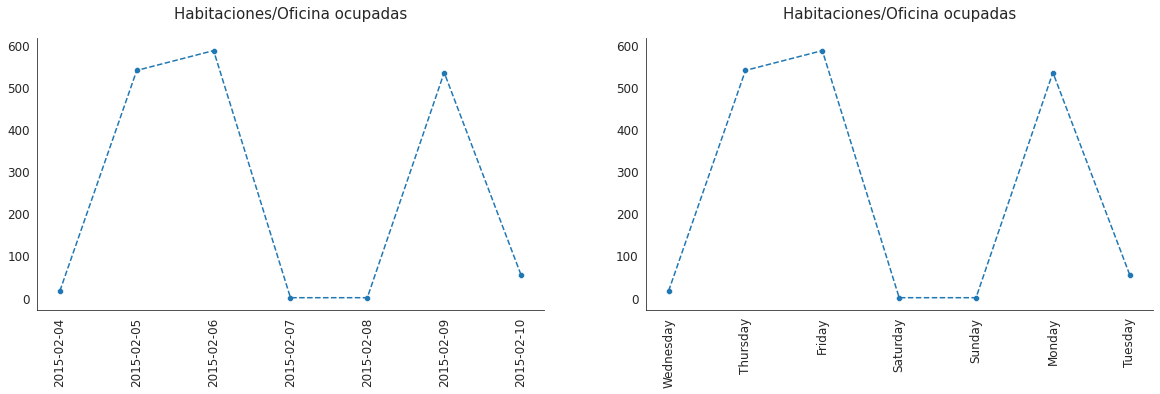

In [466]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharex = False, sharey = False)
# https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/#:~:text=We%20can%20use%20the%20plt,axis%20width%20and%20height%2C%20respectively.
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)

# Fechas
sns.lineplot(data = df_day, x = 'date', y = 'Occupancy', linestyle = '--', ax = axes[0])
sns.scatterplot(data = df_day, x = 'date', y = 'Occupancy', ax = axes[0])

axes[0].set_title('Habitaciones/Oficina ocupadas', fontsize = 15, pad = 20)
axes[0].set_ylabel('')
axes[0].set_xlabel('')
plt.sca(axes[0])
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)

date_form = DateFormatter("%Y-%m-%d")
axes[0].xaxis.set_major_formatter(date_form)

# Dias de la semana
sns.lineplot(data = df_day, x = 'day_of_week', y = 'Occupancy', linestyle = '--', ax = axes[1])
sns.scatterplot(data = df_day, x = 'day_of_week', y = 'Occupancy', ax = axes[1])

axes[1].set_title('Habitaciones/Oficina ocupadas', fontsize = 15, pad = 20)
axes[1].set_ylabel('')
axes[1].set_xlabel('')
plt.sca(axes[1])
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)

sns.despine();

In [467]:
# Se puede observar diferencias en la cantidad de habitaciones/oficinas ocupadas dependiendo el dia
# La mayor ocupacion de habitaciones/oficinas se da los jueves, viernes y lunes

In [468]:
# Habitaciones/oficinas ocupadas por hora del dia
# https://stackoverflow.com/questions/43585988/python-pandas-sum-by-hour-of-day
df_hour = df.groupby([df['date'].dt.hour])[['Occupancy']].sum()
df_hour = df_hour.reset_index()

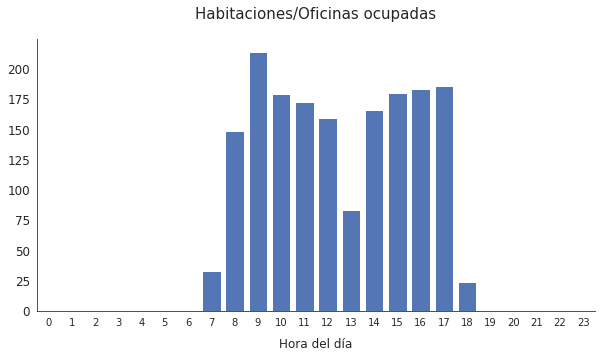

In [469]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

sns.barplot(data = df_hour, x = 'date', y = 'Occupancy', color = my_palette[0], ax = ax)
plt.title('Habitaciones/Oficinas ocupadas', fontsize = 15, pad = 20)
plt.ylabel('')
plt.yticks(fontsize = 12)
plt.xlabel('Hora del día', fontsize = 12, labelpad = 10)
plt.yticks(fontsize = 12)

sns.despine()
plt.gcf().set_size_inches(10, 5);

In [470]:
# Se observa una concentracion entre las 8h00 y 17h00, con una reducción alrededor de las 13h00

#### **Machine Learning para predicción**

In [471]:
# Librerias
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Matriz de variables explicativas y variable objetivo

In [472]:
# Convertir a dummies los dias de las semanas y las horas del dia
df['DayWeek'] = df['date'].dt.day_name()
df['Hour'] = df['date'].dt.hour

cat_var = ['DayWeek', 'Hour']
for cat in cat_var:
  df[cat] = df[cat].astype('category')

df = pd.get_dummies(df)

df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Count,DayWeek_Friday,DayWeek_Monday,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [473]:
# Matriz de variables explicativas y variable objetivo
X_var = df.drop(['date', 'Count', 'Occupancy'], axis = 1).columns
X = df.loc[:, X_var]

y = df.loc[:, 'Occupancy']. values

print('Dimensiones X:', X.shape)
print('Dimensiones y:', y.shape)

Dimensiones X: (8143, 36)
Dimensiones y: (8143,)


In [474]:
# Dividir en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2731,
                                                    stratify = y)

In [475]:
# Ver proporcion de 0 y 1 en la base de entrenamiento y test
print('Train')
print(round(pd.DataFrame(y_train).value_counts() / len(y_train) * 100, 2), '\n')

print('Test')
print(round(pd.DataFrame(y_test).value_counts() / len(y_test) * 100, 2), '\n')

Train
0    78.77
1    21.23
dtype: float64 

Test
0    78.76
1    21.24
dtype: float64 



In [476]:
# Aplicar estandarizacion a todas las variables, excepto a las variables binarias
# https://stackoverflow.com/questions/27275236/pandas-best-way-to-select-all-columns-whose-names-start-with-x
dummy_cols1 = [col for col in df if col.startswith('DayWeek_')]
dummy_cols2 = [col for col in df if col.startswith('Hour_')]

dummy_cols = dummy_cols1 + dummy_cols2

In [477]:
# Variables continuas y binarias
X_var2 = X_train.drop(dummy_cols, axis = 1).columns

X_train_nodummy = X_train.loc[:, X_var2]
X_test_nodummy = X_test.loc[:, X_var2]

X_train_dummy = X_train.loc[:, dummy_cols]
X_test_dummy = X_test.loc[:, dummy_cols]

In [478]:
# Escalar datos - variables continuas
scaler = StandardScaler()
X_train_nodummy_sc = scaler.fit_transform(X_train_nodummy)
X_test_nodummy_sc = scaler.transform(X_test_nodummy)

In [479]:
# Unir variables continuas estandarizadas junto con variables categoricas
X_train_sc = pd.merge(pd.DataFrame(X_train_nodummy_sc),
                      pd.DataFrame(X_train_dummy.reset_index(drop = True).values),
                      left_index = True, right_index = True).values

X_test_sc = pd.merge(pd.DataFrame(X_test_nodummy_sc),
                     pd.DataFrame(X_test_dummy.reset_index(drop = True).values),
                     left_index = True, right_index = True).values

Estimación de modelos

In [480]:
# Funcion para obtener metricas de validacion de los modelos a ser probados

def model_class(model, X_train, X_test, y_train, y_test, method):
  # Seed
  np.random.seed(2731)
  # Estimacion
  model.fit(X_train, y_train)
  # Metricas
  Score_train = model.score(X_train, y_train)
  Score_test = model.score(X_test, y_test)
  # Resultados
  print(f'\nReporte del modelo\n{method}\n')
  print(f'Mean accuracy (Train): {Score_train:.4f}')
  print(f'Mean accuracy (Test): {Score_test:.4f}')

* KNN

In [481]:
# Encontrar cantidad optima de k y el peso a utilizar 
np.random.seed(2731) # seed

# Modelo
knn_class = KNeighborsClassifier()

# Parametros a evaluar en la funcion 'GridSearchCV'
parameters = {'n_neighbors': range(2, 40, 1),
              'weights': ['uniform', 'distance']} 

# Determinacion y ejecucion del modelo
gridsearch_knn_class = GridSearchCV(knn_class, parameters, cv = 10)
gridsearch_knn_class.fit(X_train_sc, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [482]:
# Resultado
print(gridsearch_knn_class.best_params_)

k_opt = gridsearch_knn_class.best_params_['n_neighbors']
w_opt = gridsearch_knn_class.best_params_['weights']

{'n_neighbors': 5, 'weights': 'distance'}


In [483]:
# Estimacion
knn_class = KNeighborsClassifier(n_neighbors = k_opt, 
                                 weights = w_opt)

model_class(knn_class, X_train_sc, X_test_sc, y_train, y_test, 'KNeighbors Classifier')


Reporte del modelo
KNeighbors Classifier

Mean accuracy (Train): 1.0000
Mean accuracy (Test): 0.9902


* Regresión Logit

In [484]:
# Librerias
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [485]:
# Lista de valores a probar para 'C'
scores = []
C_range = [1] + list(range(10, 110, 10))
for c in C_range:
  log_regress = LogisticRegression(C = c, solver = 'liblinear', max_iter = 1000)
  log_regress.fit(X_train_sc, y_train)
  score = log_regress.score(X_test_sc, y_test)
  scores.append(score)

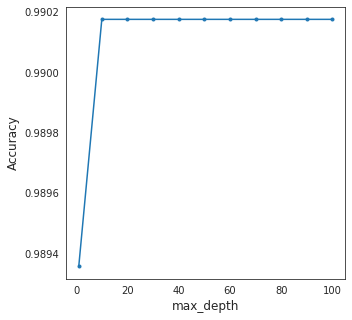

In [486]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axes.plot(C_range, scores, marker = '.')
axes.set_xlabel('max_depth', fontsize = 12)
axes.set_ylabel('Accuracy', fontsize = 12);

In [487]:
max_value = max(scores)
max_index = scores.index(max_value)

print(max_value)
print(max_index)

0.9901760130986492
1


In [488]:
C_opt = C_range[max_index]

In [489]:
# Lista de valores a probar para 'penalty'
scores = []
for pen in ['l1', 'l2']:
  log_regress = LogisticRegression(C = C_opt, solver = 'liblinear', penalty = pen, max_iter = 1000)
  log_regress.fit(X_train_sc, y_train)
  score = log_regress.score(X_test_sc, y_test)
  scores.append(score)

In [490]:
max_value = max(scores)
max_index = scores.index(max_value)

list(zip(['l1', 'l2'], scores))

[('l1', 0.9905853458862055), ('l2', 0.9901760130986492)]

In [491]:
# Estimacion
log_regress = LogisticRegression(C = C_opt, 
                                 penalty = 'l1', 
                                 solver = 'liblinear', 
                                 max_iter = 1000)

model_class(log_regress, X_train_sc, X_test_sc, y_train, y_test, 'Logistic Regression: L1')


Reporte del modelo
Logistic Regression: L1

Mean accuracy (Train): 0.9919
Mean accuracy (Test): 0.9906


In [492]:
# Area debajo de la curva ROC
roc_auc_score_train = roc_auc_score(y_train, log_regress.predict_proba(X_train_sc)[:, 1])
roc_auc_score_test = roc_auc_score(y_test, log_regress.predict_proba(X_test_sc)[:, 1])

print(f'Training AUC: {round(roc_auc_score_train, 5)}')
print(f'Test AUC: {round(roc_auc_score_test, 5)}')

Training AUC: 0.99917
Test AUC: 0.9986


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


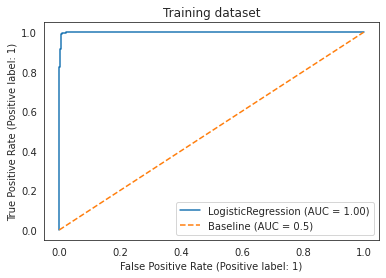

In [493]:
# Visualizar la curva ROC
plot_roc_curve(log_regress, X_train_sc, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.title('Training dataset')
plt.legend();

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


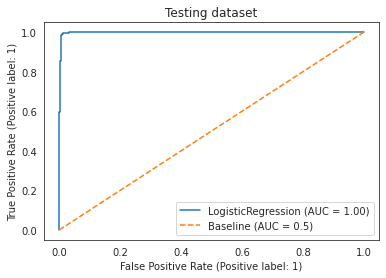

In [494]:
# Visualizar la curva ROC
plot_roc_curve(log_regress, X_test_sc, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.title('Testing dataset')
plt.legend();

* Random Forest - Datos escalados

In [495]:
# Lista para almacenar los scores para cada valor de n_estimators
scores = []
n_estimator_range = [1] + list(range(10, 210, 10))
for estimator in n_estimator_range:
  rfor_class = RandomForestClassifier(n_estimators = estimator, bootstrap = True, random_state = 2731)
  rfor_class.fit(X_train_sc, y_train)
  score = rfor_class.score(X_test_sc, y_test)
  scores.append(score)

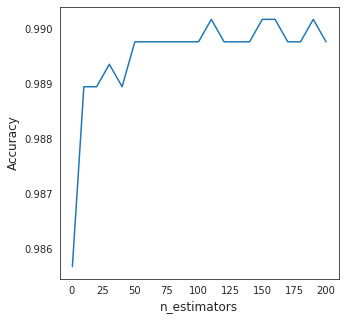

In [496]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axes.plot(n_estimator_range, scores)
axes.set_xlabel('n_estimators', fontsize = 12)
axes.set_ylabel('Accuracy', fontsize = 12);

In [497]:
max_value = max(scores)
max_index = scores.index(max_value)

print(max_value)
print(max_index)

0.9901760130986492
11


In [498]:
n_est_opt1 = n_estimator_range[max_index]

In [499]:
# Estimacion
rfor_class1 = RandomForestClassifier(n_estimators = n_est_opt1,
                                     bootstrap = True,
                                     random_state = 2731)

model_class(rfor_class1, X_train_sc, X_test_sc, y_train, y_test, 'Random Forest Classifier: Standardized data')


Reporte del modelo
Random Forest Classifier: Standardized data

Mean accuracy (Train): 1.0000
Mean accuracy (Test): 0.9902


* Random Forest - Datos a nivel

In [500]:
# Lista para almacenar los scores para cada valor de n_estimators
scores = []
n_estimator_range = [1] + list(range(10, 210, 10))
for estimator in n_estimator_range:
  rfor_class = RandomForestClassifier(n_estimators = estimator, bootstrap = True, random_state = 2731)
  rfor_class.fit(X_train, y_train)
  score = rfor_class.score(X_test, y_test)
  scores.append(score)

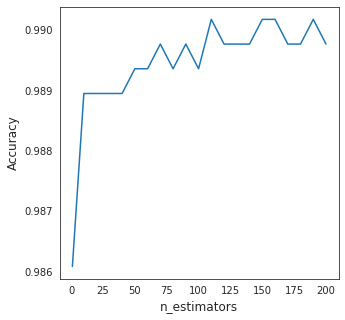

In [501]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axes.plot(n_estimator_range, scores)
axes.set_xlabel('n_estimators', fontsize = 12)
axes.set_ylabel('Accuracy', fontsize = 12);

In [502]:
max_value = max(scores)
max_index = scores.index(max_value)

print(max_value)
print(max_index)

0.9901760130986492
11


In [503]:
n_est_opt2 = n_estimator_range[max_index]

In [504]:
# Estimacion
rfor_class2 = RandomForestClassifier(n_estimators = n_est_opt2,
                                     bootstrap = True,
                                     random_state = 2731)

model_class(rfor_class2, X_train, X_test, y_train, y_test, 'Random Forest Classifier: No standardized data')


Reporte del modelo
Random Forest Classifier: No standardized data

Mean accuracy (Train): 1.0000
Mean accuracy (Test): 0.9902


#### **Resultados**

In [505]:
model_class(knn_class, X_train_sc, X_test_sc, y_train, y_test, 'KNeighbors Classifier')


Reporte del modelo
KNeighbors Classifier

Mean accuracy (Train): 1.0000
Mean accuracy (Test): 0.9902


In [506]:
model_class(log_regress, X_train_sc, X_test_sc, y_train, y_test, 'Logistic Regression: L1')


Reporte del modelo
Logistic Regression: L1

Mean accuracy (Train): 0.9919
Mean accuracy (Test): 0.9906


In [507]:
model_class(rfor_class1, X_train_sc, X_test_sc, y_train, y_test, 'Random Forest Classifier: Standardized data')


Reporte del modelo
Random Forest Classifier: Standardized data

Mean accuracy (Train): 1.0000
Mean accuracy (Test): 0.9902


In [508]:
model_class(rfor_class2, X_train, X_test, y_train, y_test, 'Random Forest Classifier: No standardized data')


Reporte del modelo
Random Forest Classifier: No standardized data

Mean accuracy (Train): 1.0000
Mean accuracy (Test): 0.9902


En función de estos resultados, se opta por el modelo de Regresión Logística. LA AUC del ROC tiende a ser cercana a 1, tanto en la muestra de entrenamiento como en la de validación, lo que sugiere una buena capacidad del modelo para distinguir o discriminar entre los casos de 1 y 0 para determinar si la sala de oficina está ocupada o no. No obstante, como se puede observar, los resultados muestran que los distintos modelos empleados tienden a tener un precisión, cercana a 1, tanto en la base de entrenamiento como de prueba.